In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
import datetime
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PowerTransformer

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import


import warnings 
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv(r'C:\Users\hites\Downloads\Powerplant_India.csv')

In [117]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [118]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [120]:
df.shape

(908, 25)

There are 25 columns and 908 rows in the dataset.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Observation:

There are 25 columns and 908 rows in the dataset.

While some features use object datatypes, others use float datatypes.

other_fuel3,estimated_generation_gwh,wepp_id are empty columns.

we can also notice the presence of null-values in the dataset.

In [123]:
#lets visualize the missing value by using heatmap.

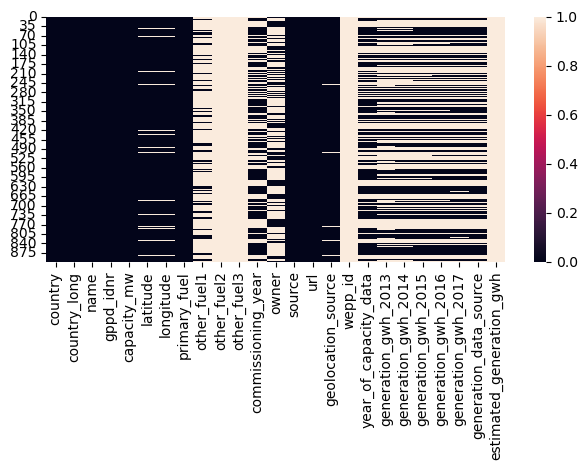

In [122]:
sns.heatmap(df.isnull())
plt.show()

In [124]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Observation:

17 out 25 columns having a missing values.

estimated_generation_gwh - Empty data

wepp_id - Empty data

other_fuel2 - 98% data is missing

other_fuel3 - Empty data

owner - More than 62 % data is missing

year_of_capacity_data - Missing data with single unique value

country - non relevalent information

country_long - non relevalent information

gppd_idnr -non relevalent information 

url - no missing value but useless


In [125]:
#Now Checking the value of each column

for column_name in df.columns:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:\n{value_counts}\n")

Value counts for country:
IND    908
Name: country, dtype: int64

Value counts for country_long:
India    908
Name: country_long, dtype: int64

Value counts for name:
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: name, Length: 908, dtype: int64

Value counts for gppd_idnr:
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: gppd_idnr, Length: 908, dtype: int64

Value counts for capacity_mw:
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: capacity_mw, Length: 365, dtype: int64

Value co

No whitespace, NA, '-' exist in dataset.

In [126]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,837
longitude,828
primary_fuel,8
other_fuel1,3
other_fuel2,1


Observation:
    
From value count and uniques values we can observe that there is no whitespace are present in the dataset.
    
The mean or median of longitude and latitude can be used to impute longitude and latitude. Since the mean will remain the same at the end, this imputation won't affect the statistical balance of the data.
    
40% data in the commissioning year are missing we will decide whether to keep or drop this feature after checking the correlation and will use mean to fill Na in the dataset.
    
In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.

generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and we will treat the null values with median.

commissioning year is a categorical or discrete variable in the data with varying distributions, the commissioning year will be filled with mode.
    
Other_fuel1 is another feature of some importance with missing value.Not all power plants are designed to run on alternative fuels.
The concept of alternative fuels has no bearing on power plants that rely on renewable energy sources, such as solar, wind, or hydro.
First, discuss the power plant that the other fuel concept applies to. They can be assumed based on our domain expertise.
Oil or cogeneration are the most common alternative fuels for coal-based power plants.
Gas is a substitute fuel for industrial oil-based power plants.
Oil is an alternative fuel used in industrial gas-based power plants.
Since nuclear power plant design is based on so many factors, we are unable to define any alternative fuel for these types of plants.
       

In [127]:
df.duplicated().sum()

0

No Duplicate values Present in dataset.

# Dropping the unnecessary Columns

Dropping Empty and non relevant as we discussed abvove because their no contribution in the dataset.

In [128]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_data_source'],axis=1,inplace=True)

In [129]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


Seperating Numerical and Categorial data

In [130]:
categorial_col = []
for i in df.dtypes.index:
    if df.dtypes[i]  == "object":
        categorial_col.append(i)
print("Categorial Columns: " , categorial_col)  
print("\n")



numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: " , numerical_col)

Categorial Columns:  ['name', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']


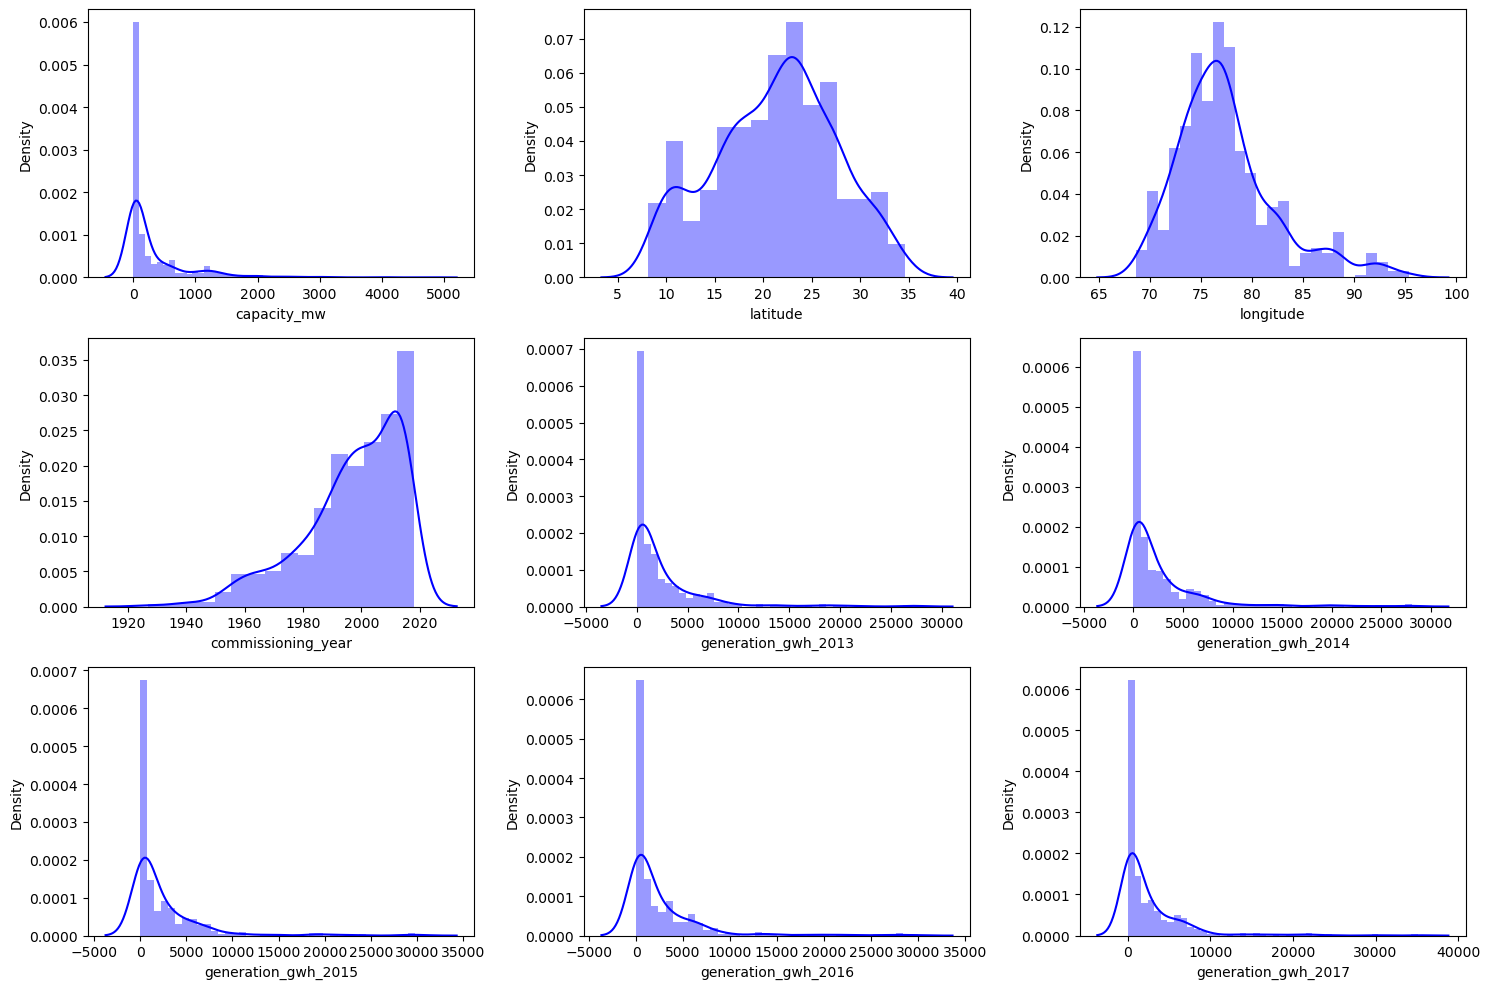

In [132]:
plt.figure(figsize=(15,10), facecolor = 'white')
plotnumber = 1


for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color = "b")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation = 0,fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

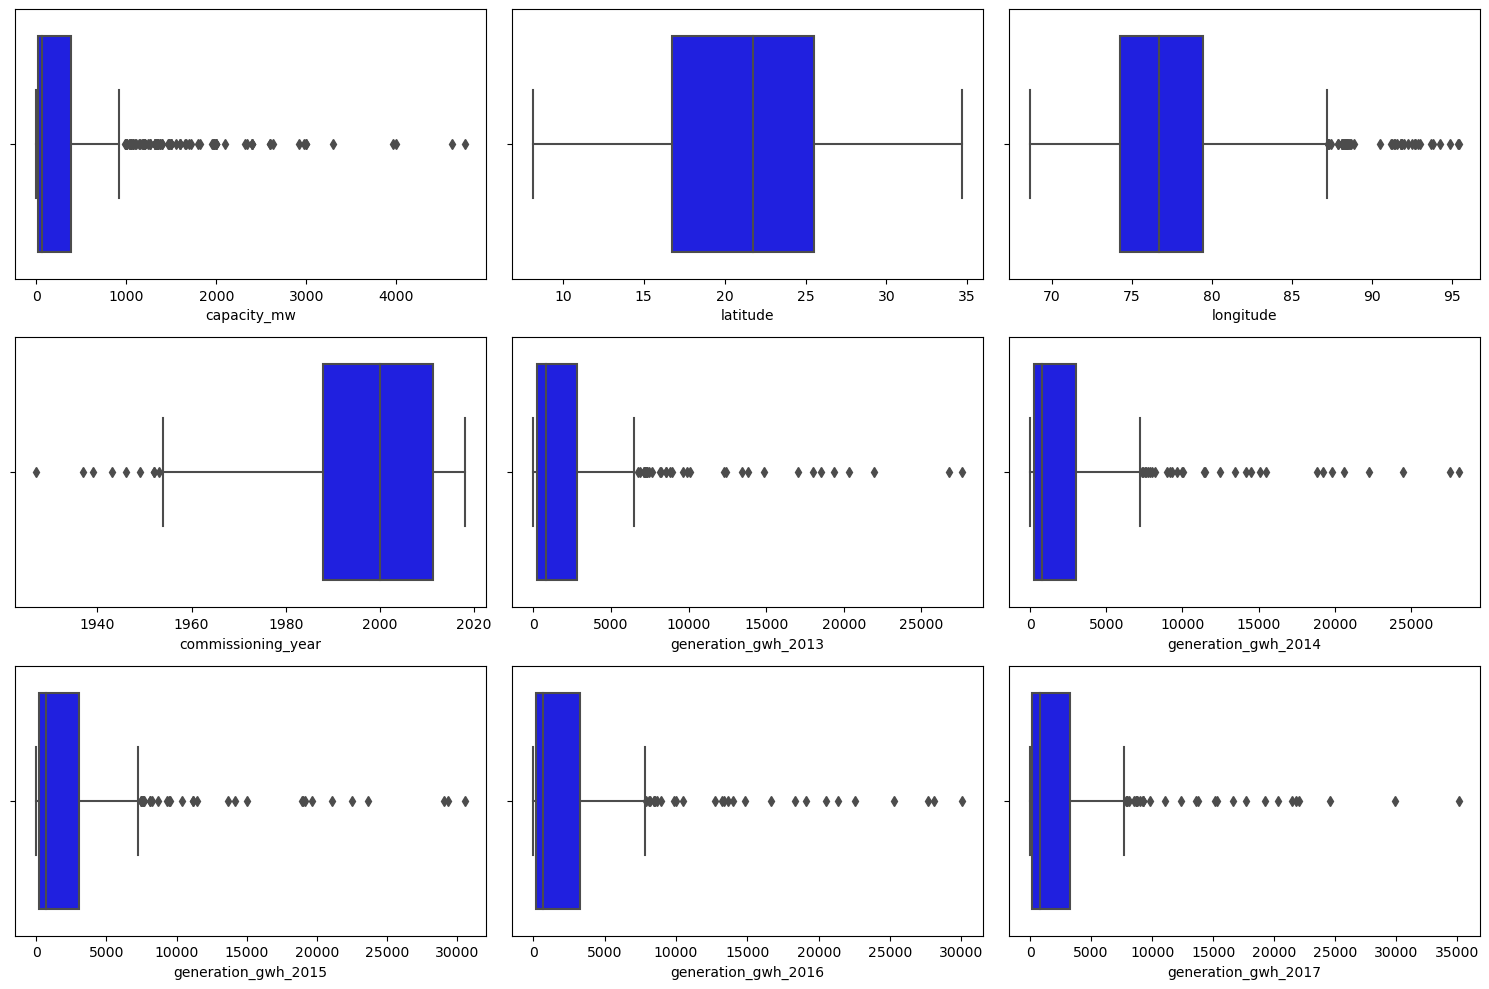

In [131]:
plt.figure(figsize=(15,10), facecolor = 'white')
plotnumber = 1


for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], color = "b")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation = 0,fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

Observation: Dist and box plot of numerical_col
    
From the abover observastion of numbercical data in distplot and boxplot we can clearly see
outliners are present in generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and we will treat the null values with median data we can also see in the value count which is 0.



# Filling Missing values

In [133]:
# For categorical features
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])


# For of Numerical features
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [134]:
df.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

So finally there io missing values are present in the dataset.

In [135]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,2003.624449,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766
std,580.221767,6.088110,4.783873,15.238021,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,797.063475,805.760000,701.027250,716.728350,807.601700
50%,60.000000,21.278850,76.719250,2013.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,2013.000000,797.063475,805.760000,701.027250,716.728350,807.601700
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


observation:
    
We can observe that all columns having count 908.000

The largest power plant has a capacity of 4760 MW.

Mean is greater than Median in each generation_gwh column.

Power plants can be found in the latitude range of 8.1689 to 34.6490 and the longitude range of 68.64 to 95.4080.

The oldest power plant was commissioned in 1927, and the most recent power plant was built in 2018. We will investigate when the majority of power plants will be operational.

The average MW capacity is 60 MW. This indicates that the dataset contains a large number of small capacity power plants.

Aside from the latitude skewness that nearly every numerical column contains. Outliners must exist, as we shall see later while dealing skewness and outliners.





Here we have two different Target  feature for regression and classification model.

# Regression Target feature - Capacity

In [136]:
print('Minimum Capacity of Powerplant:', df['capacity_mw'].min())
print('Maximum Capacity of Powerplant:', df['capacity_mw'].max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [137]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
881,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,26761.39,27594.0,29047.0,30015.0,35116.0


Observation:
    
Largest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.



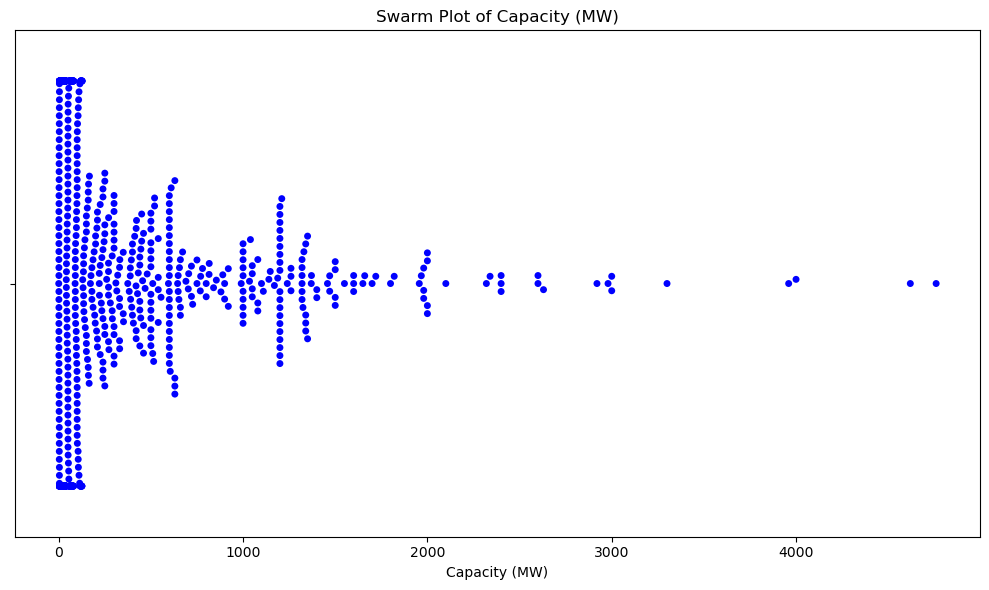

In [138]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df['capacity_mw'], color='blue')
plt.title('Swarm Plot of Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.show()

We can see there are very few powerplant of capacity more than 1500 MW. Let check

In [139]:
df.loc[df.capacity_mw >1500].shape

(37, 14)

There only 37 powerplant of capacity more than 1500 MW.

In [140]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True)

primary_fuel,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind,All
capacity_mw,,,,,,,,,
0.0,0,0,0,0,0,0,1,0,1
1.0,0,0,0,0,0,0,17,1,18
1.5,0,0,0,0,0,0,0,3,3
1.7,0,0,0,0,0,0,0,2,2
1.8,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
3960.0,0,1,0,0,0,0,0,0,1
4000.0,0,1,0,0,0,0,0,0,1
4620.0,0,1,0,0,0,0,0,0,1


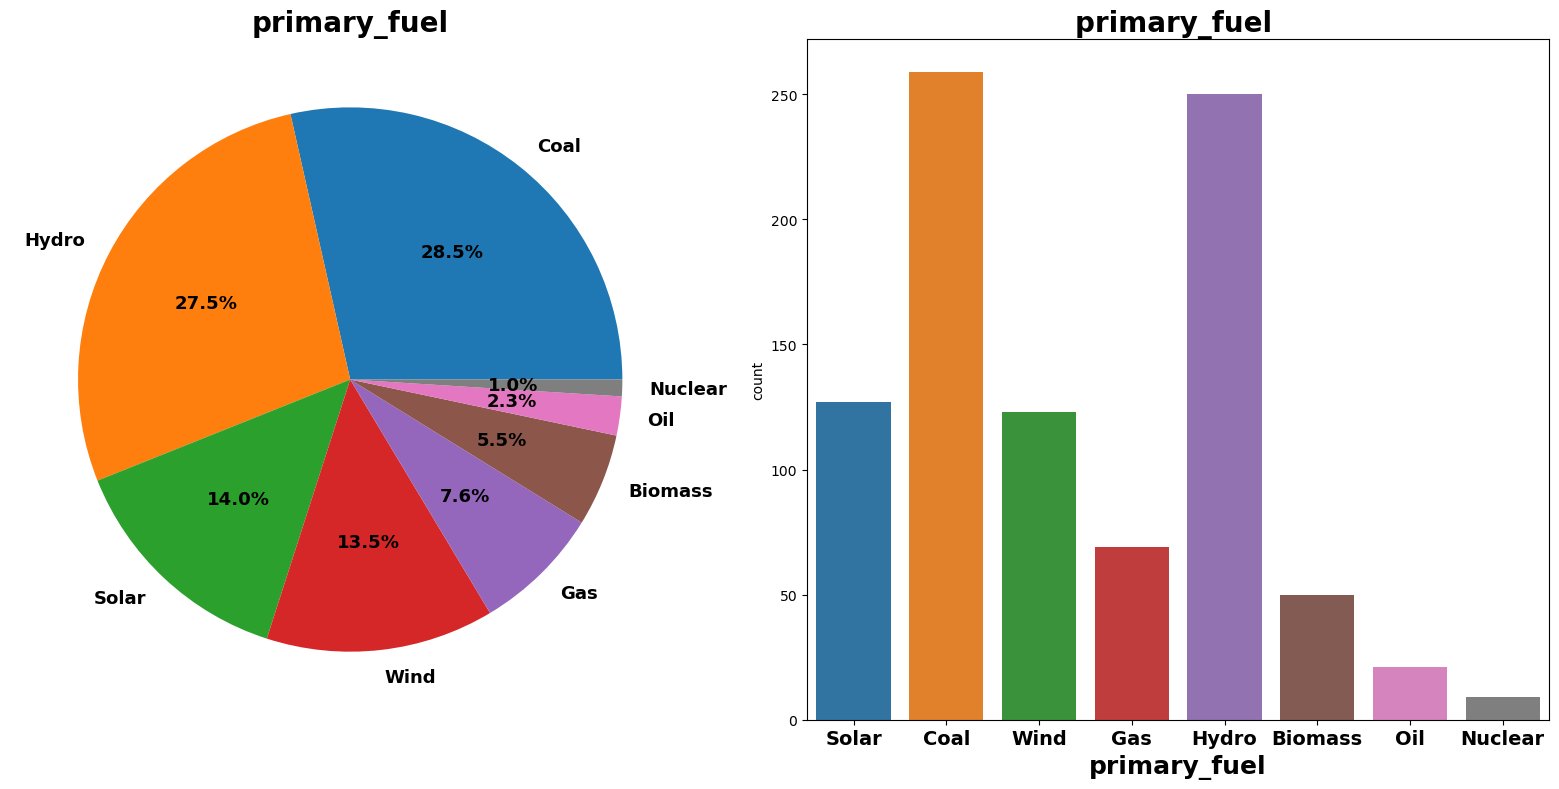

In [141]:
# Visualizing  the types of fuel in primary_fuel

plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Married' distribution
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('primary_fuel', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Married' vs 'Loan_Status'
sns.countplot('primary_fuel',  data=df, ax=ax[1])
ax[1].set_title('primary_fuel ', fontsize=20, fontweight='bold')
ax[1].set_xlabel("primary_fuel", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [142]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

Observation:
    
Most of the power plants are based on the coal and hydro.

39.4% of powerplant are based on the Non-Renewable source of energy.

Data is imbalanced so we will balance the data later.

In [143]:
#Now Let check each sector wise Capacity of power generation.

df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,201423.220
Gas,25123.871
Hydro,46331.570
Nuclear,8780.000
Oil,1978.840
Solar,2757.500
Wind,4111.850


The total power generation capacity of India is 291510.11 MW.

The biggest amount of power generated comes from coal(Thermal based power plants).

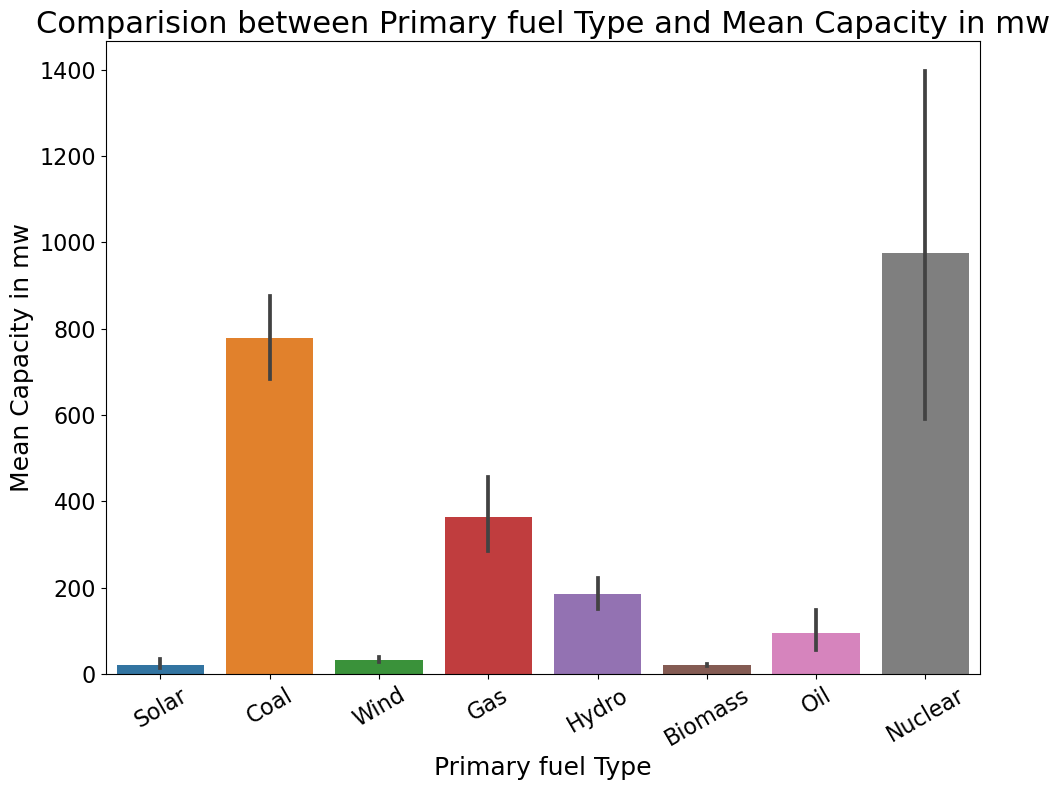

In [144]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, )
p.set_xlabel('Primary fuel Type',fontsize=18,)
p.set_ylabel('Mean Capacity in mw',fontsize=18,)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

Since there are only nine nuclear power plants, the mean capacity is larger in the above result.

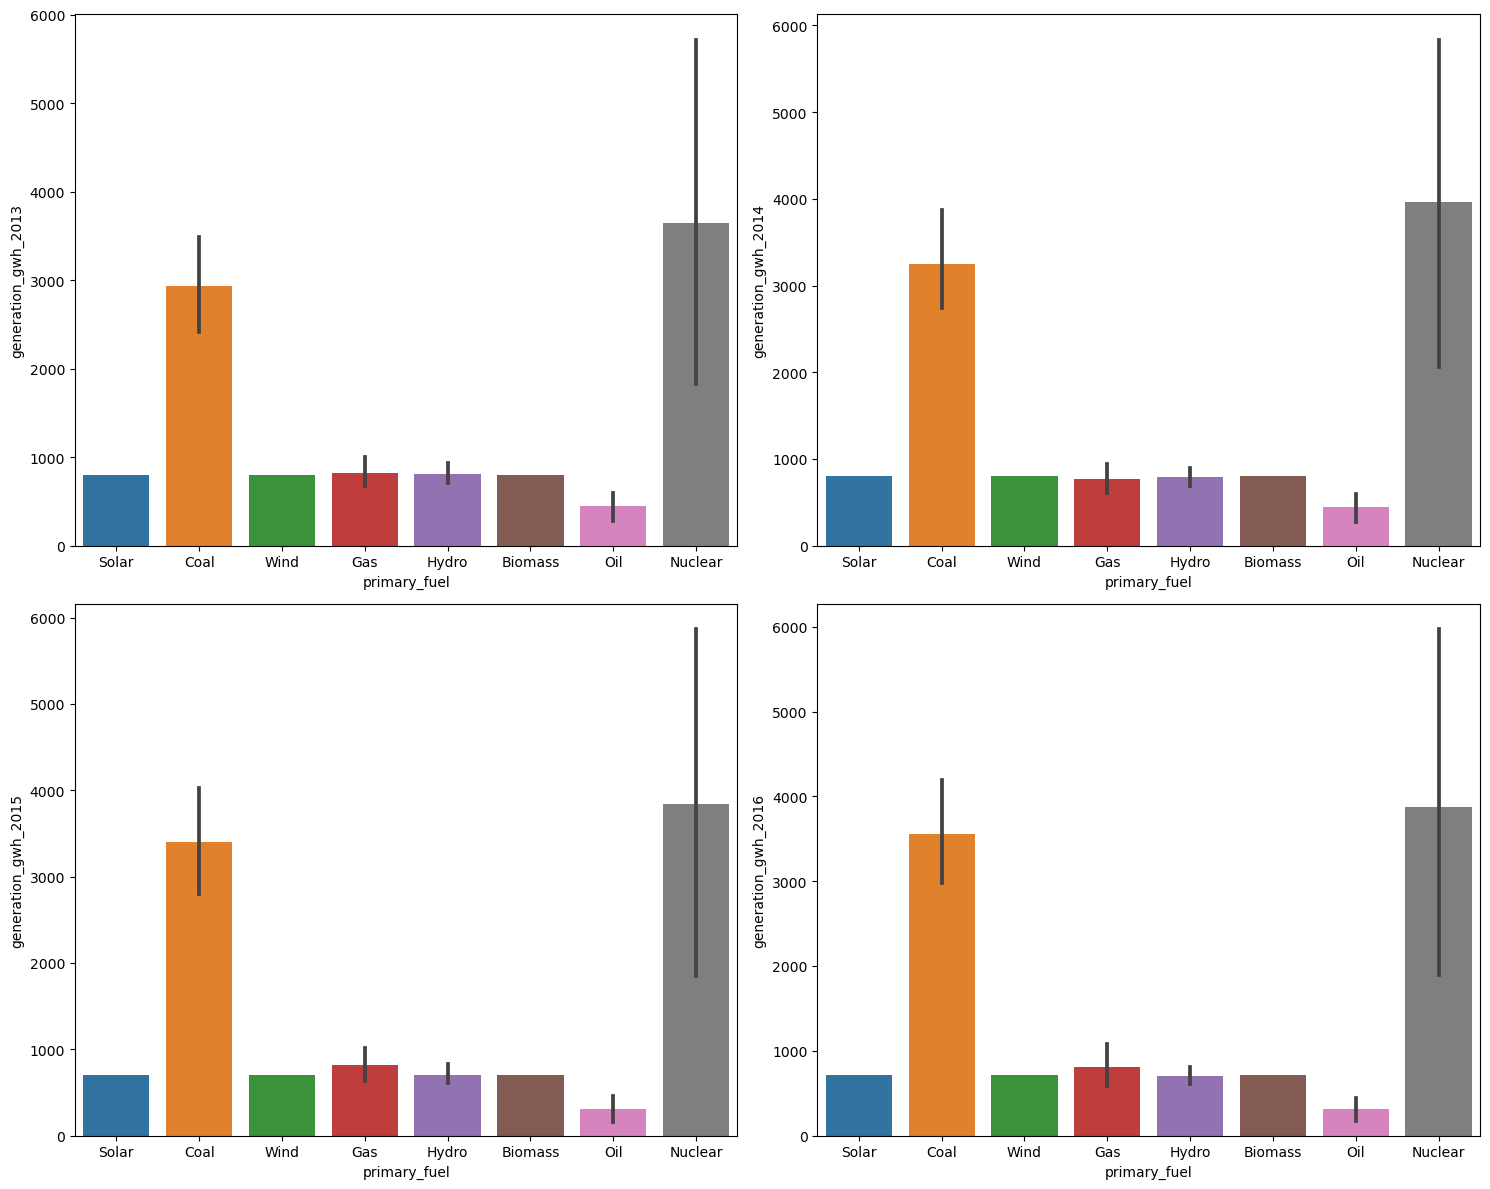

In [145]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,)
plt.show()

The graph indicates that, for every year, nuclear power has the highest mean electrical generation reports, with coal coming in second.

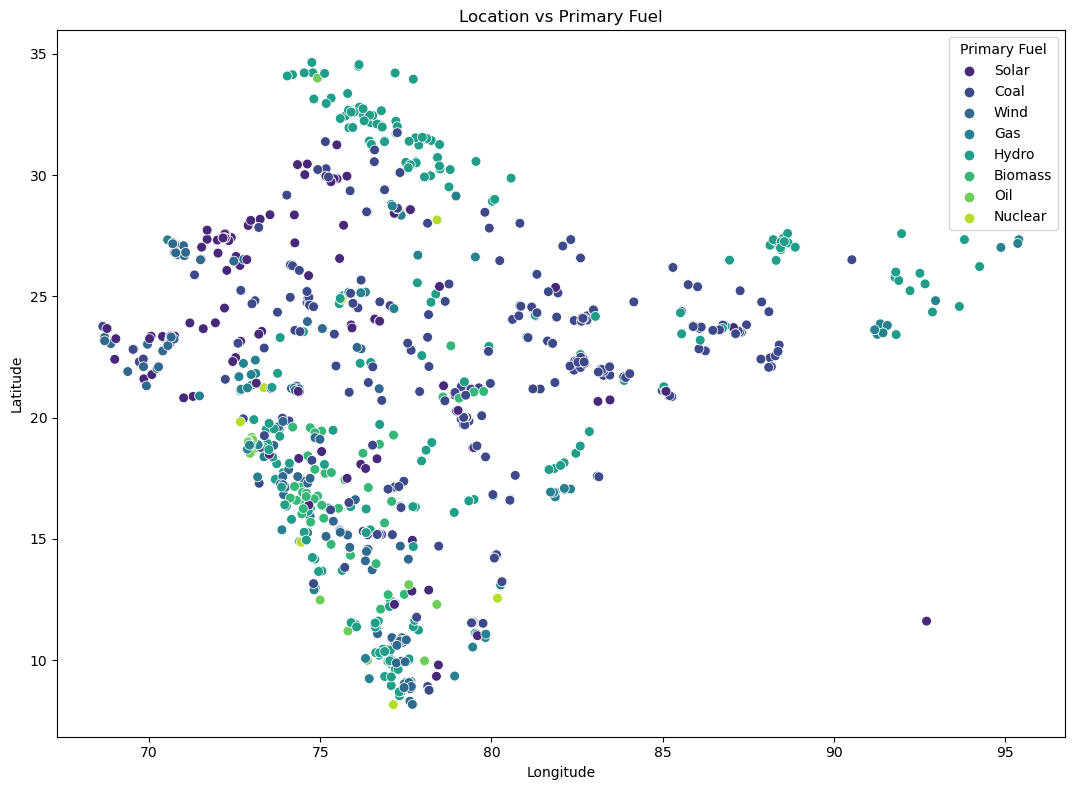

In [146]:
#Location vs Primary Fuel
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=df, palette='viridis', s=50)

plt.title('Location vs Primary Fuel')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel', bbox_to_anchor=(1, 1))
plt.show()


Location is a crucial component, particularly for nuclear power facilities.These plants are found in latitudes ranging from 15 to 25 and in longitudinal ranges from 75 to 88 degrees.

Additionally, we may see that most solar power plants are located inside a specific latitude and longitude range. This might be the result of bright, direct sunshine with little humidity.

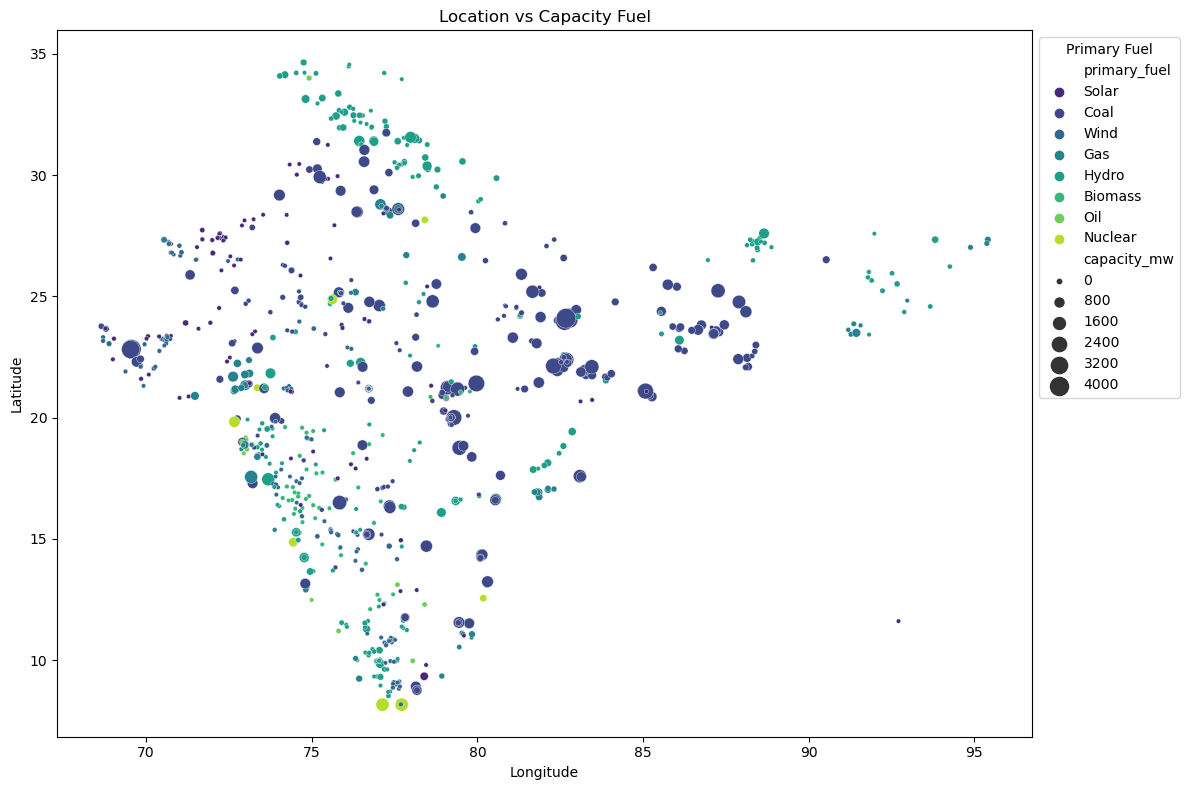

In [147]:
#Location vs Capacity

plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', size='capacity_mw', sizes=(10, 200), data=df, palette='viridis')

plt.title('Location vs Capacity Fuel')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel', bbox_to_anchor=(1, 1))
plt.show()


As we can see, the largest capacity of the region with more than 4000mw is found in the middle region, which is located at latitude 20–25 and longitude 80–85.

In [148]:
#Commission age vs primary fuel


# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [149]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [150]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
729,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,Oil,Central Electricity Authority,WRI,217.97465,220.82035,215.3777,144.4143,175.92595,91.0


Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

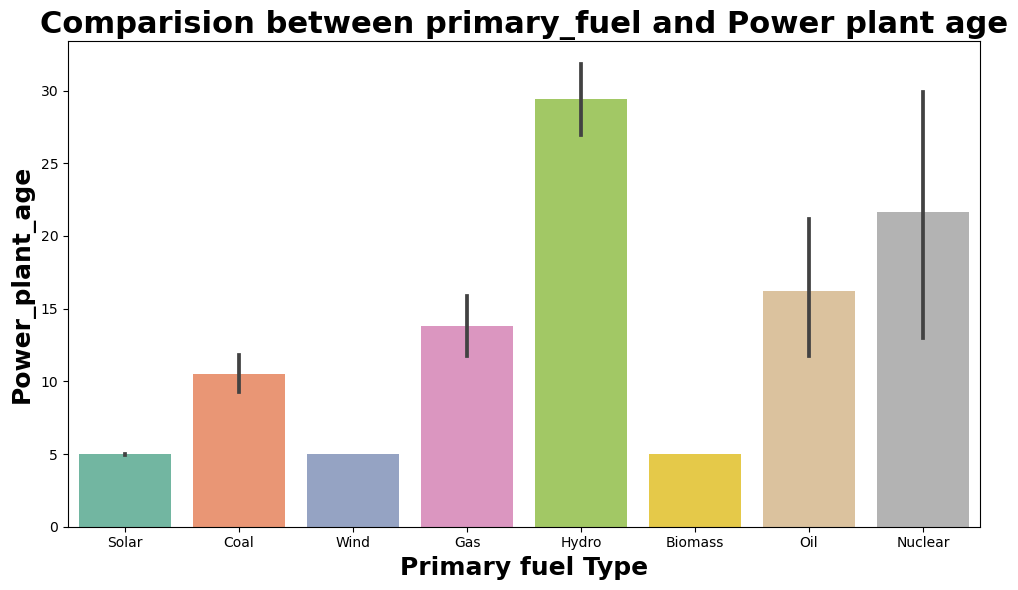

In [151]:
#Commissioning Age vs Primary Fuel

plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

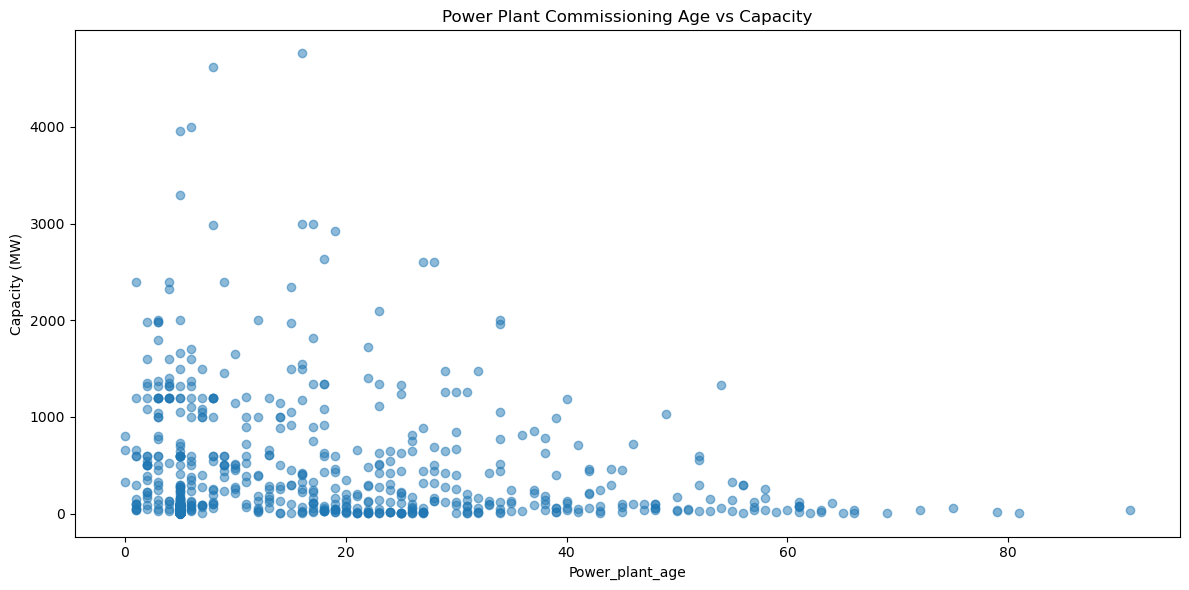

In [152]:
#Power Plant Commissioning Age vs Capacity

plt.figure(figsize=(12, 6))
plt.scatter(df['Power_plant_age'], df['capacity_mw'], alpha=0.5)
plt.title('Power Plant Commissioning Age vs Capacity')
plt.xlabel('Power_plant_age')
plt.ylabel('Capacity (MW)')
plt.show()

We can say that the capacity of older plants is significantly lower than that of recently announced power plants.

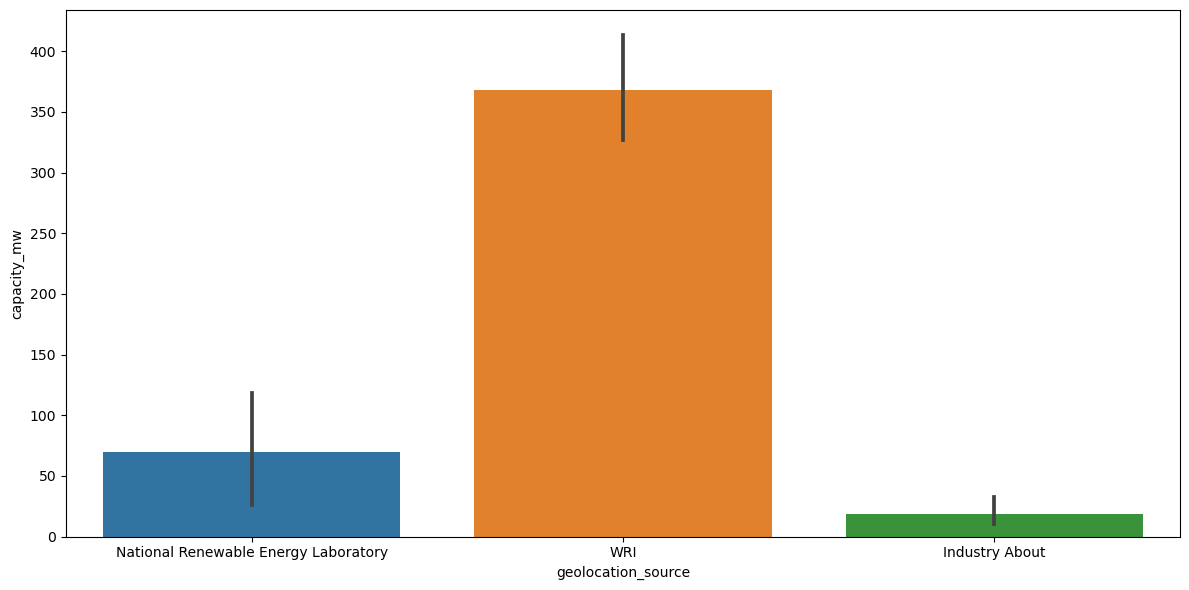

In [153]:
plt.figure(figsize = (12,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The maximum capacity of the geographical source WRI is more than 350 megawatts. The geolocation source industry has about less capacity.

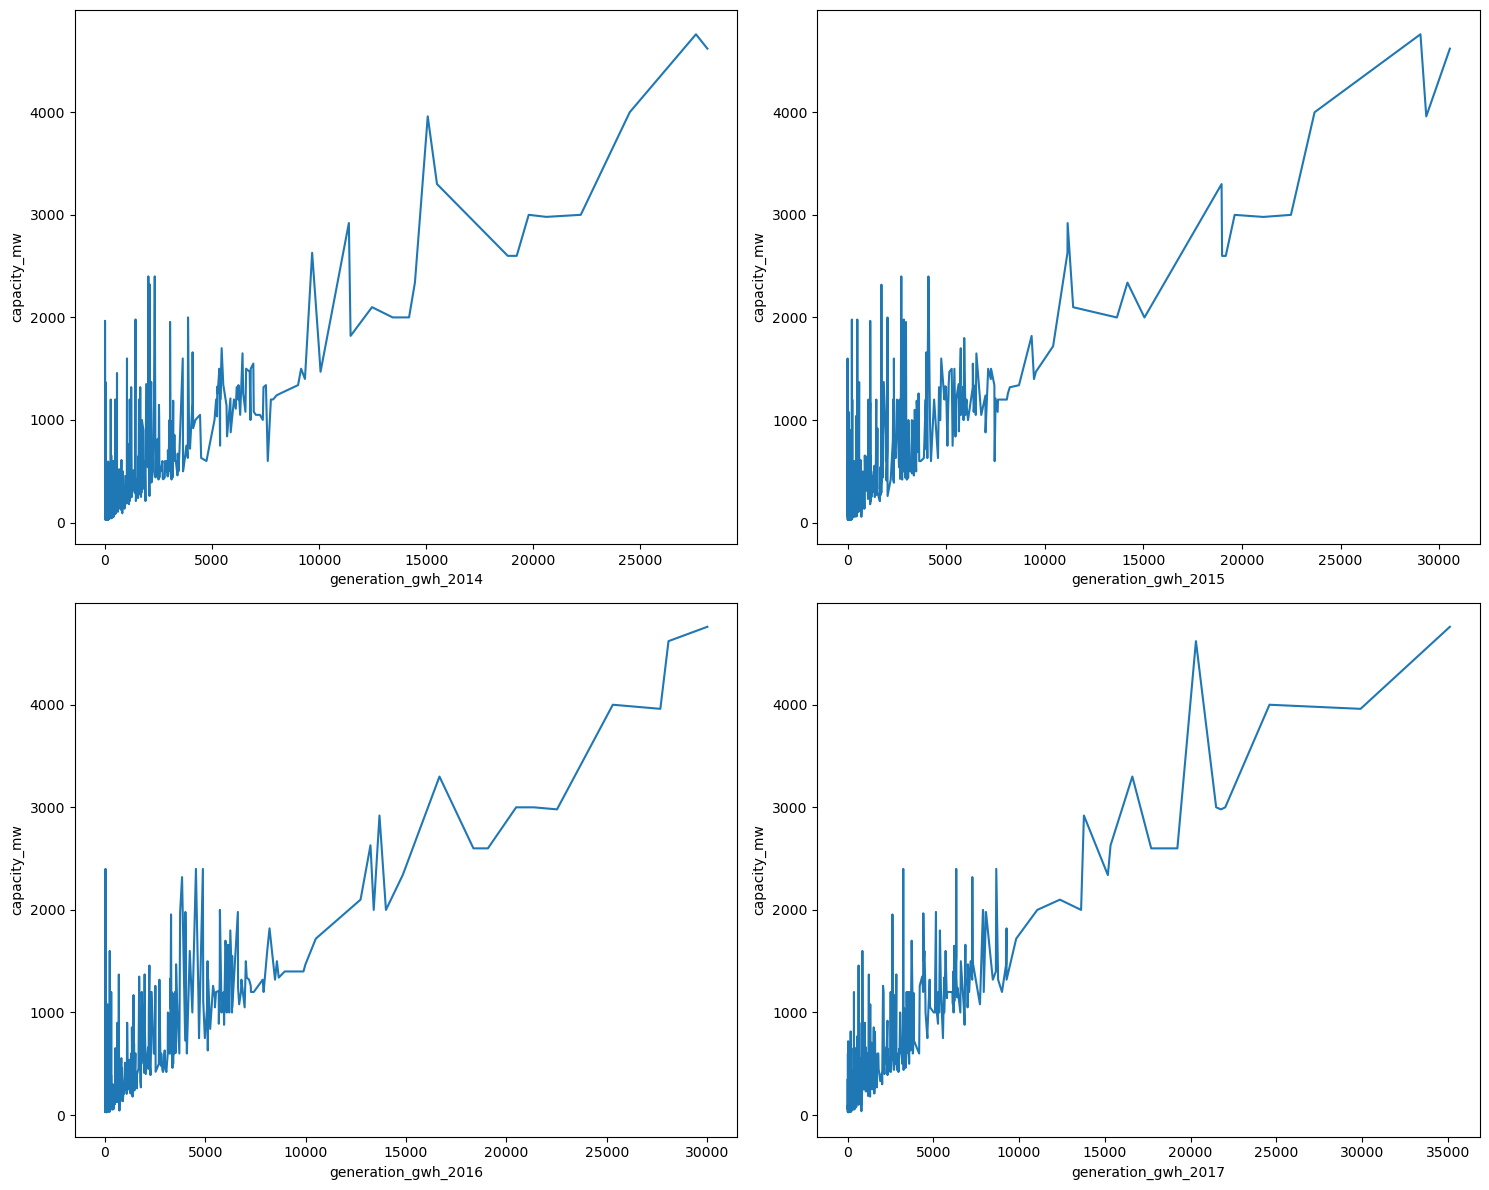

In [155]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df)

# Checking generation growth in 2015
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df)

# Checking generation growth in 2016
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df)

# Checking generation growth in 2017
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df)
plt.show()

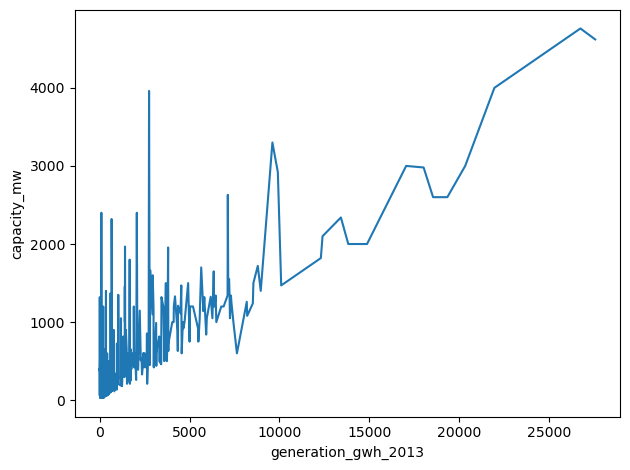

In [156]:
# Checking generation growth in 2013
sns.lineplot(x='generation_gwh_2013',y='capacity_mw',data=df)
plt.show()

Observation:-

There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

The plot shows the electricity generation reported for the years 2013, 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 25000gwh in all the years.

As the electricity generation growth increases, the capacity of plant also increases.



# Droping unnecessary column

In [157]:
df.drop(columns=['name'],axis=1,inplace=True)

In [158]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

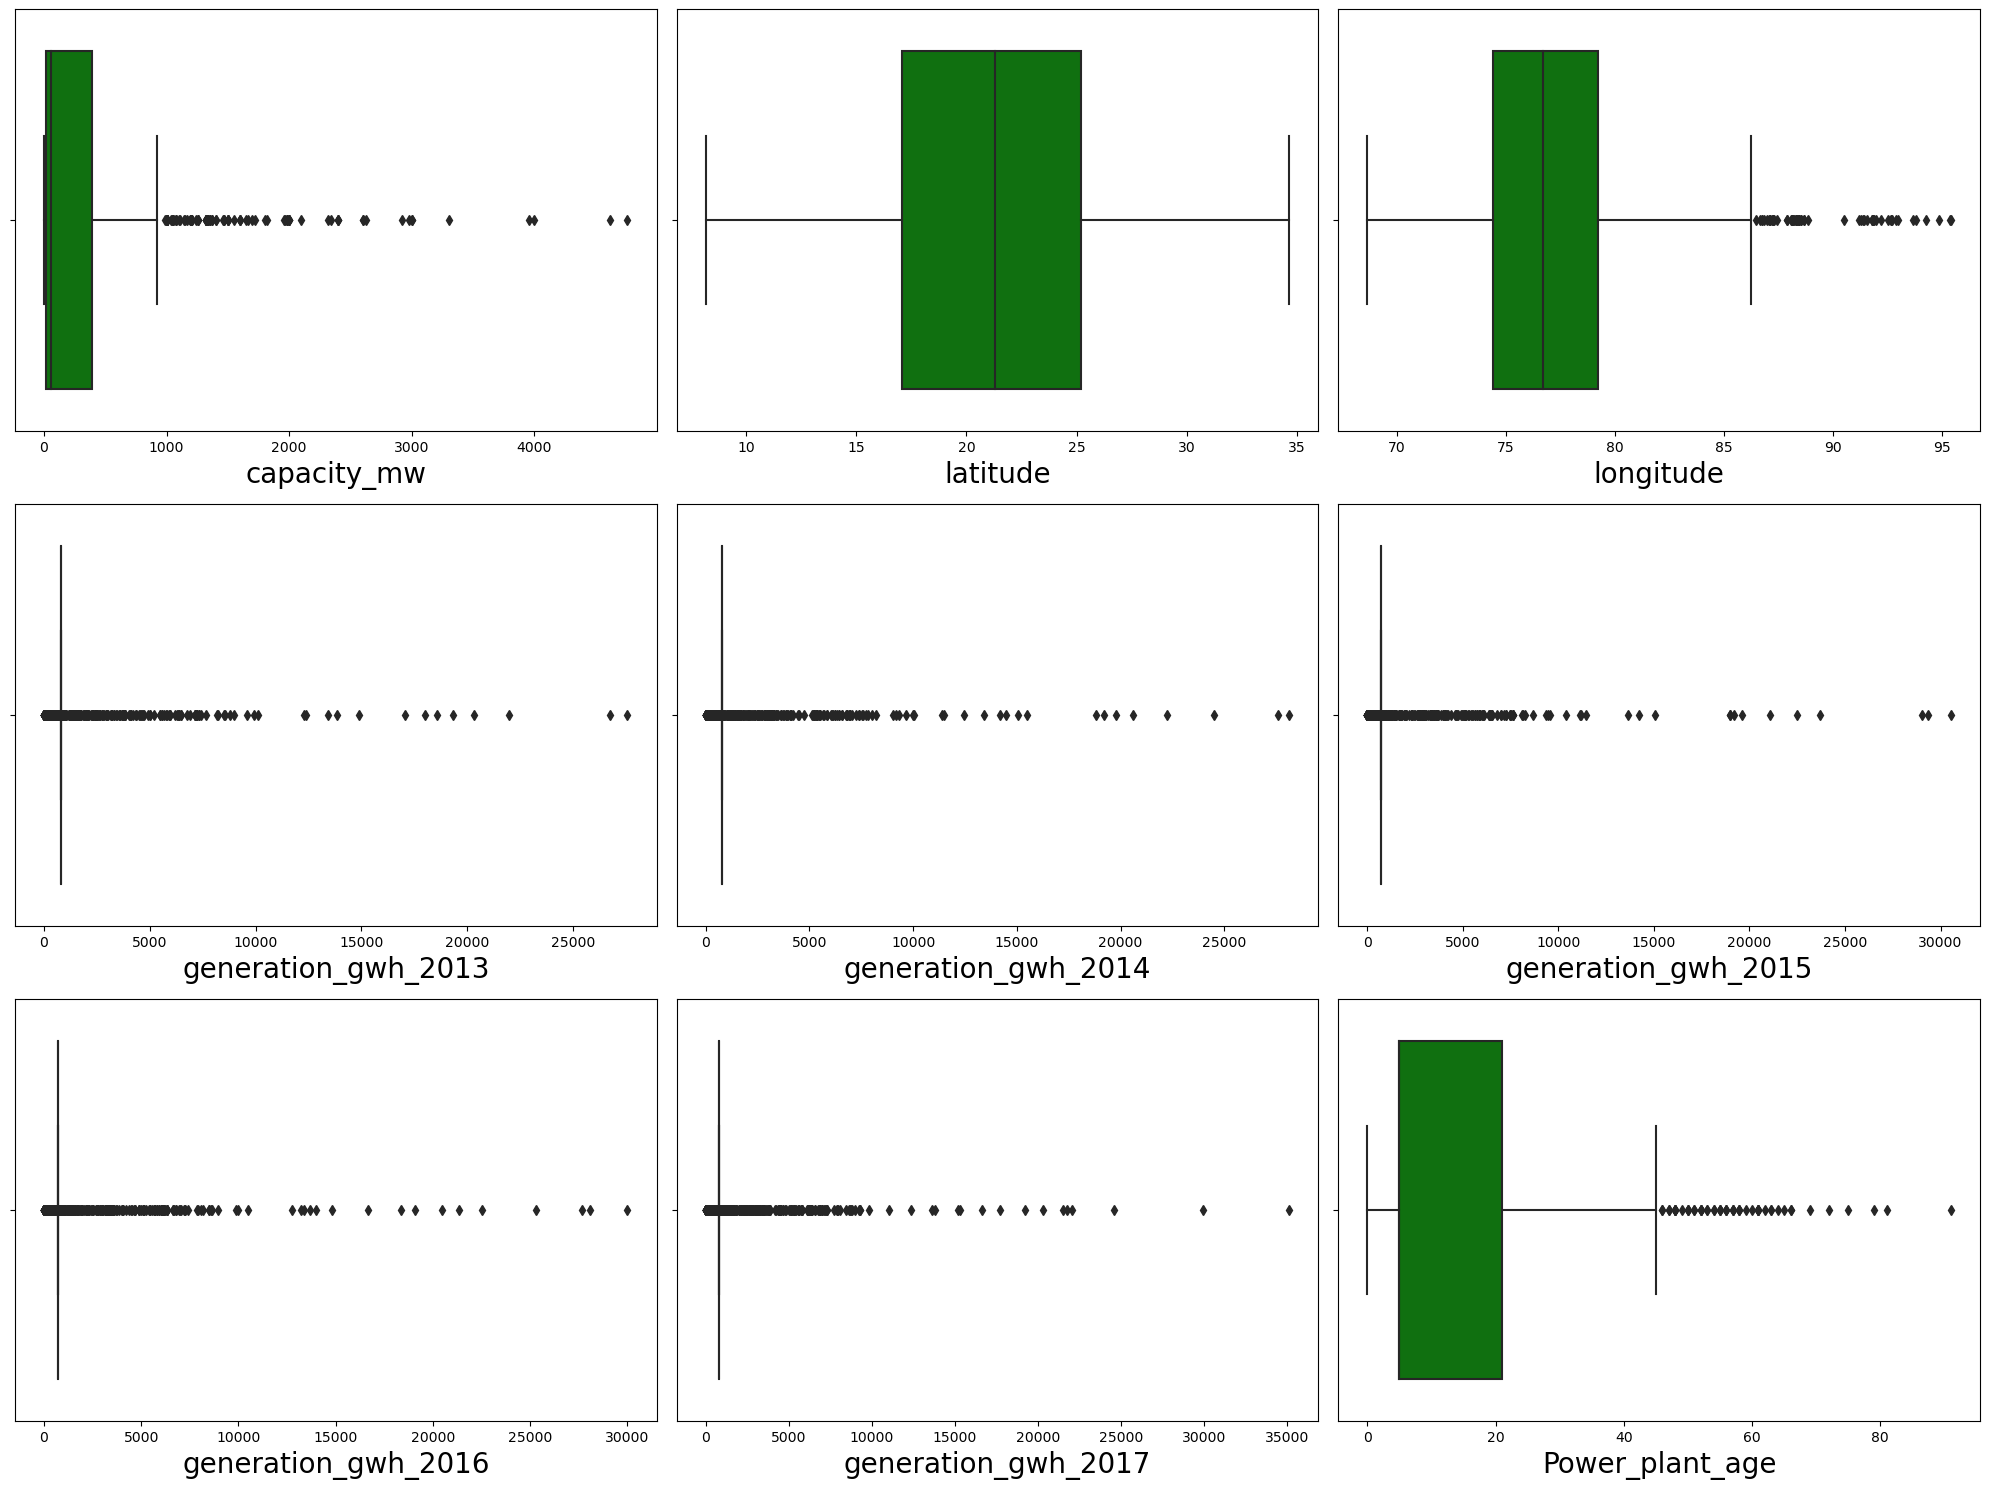

In [159]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all columns except latitude. Even target column has outliers but no need to remove it.
Let's remove outliers using ZSCORE method.

# Removing Outliers
ZSCORE method

In [160]:
# features containing outliers
features = df[['Power_plant_age','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

In [161]:
z=np.abs(zscore(features))
z

,Power_plant_age,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.484290,0.872209,0.247545,0.256321,0.268736,0.278209,0.276171
1,0.615613,0.586027,0.247545,0.256321,0.268736,0.278209,0.276171
2,0.615613,1.681100,0.247545,0.256321,0.268736,0.278209,0.276171
3,0.024659,2.917501,0.311744,0.323889,0.220902,0.221881,0.323391
4,0.746936,1.045370,0.090853,0.545202,1.479248,1.560680,1.226826
...,...,...,...,...,...,...,...
903,0.812597,0.011323,0.247545,0.256321,0.503361,0.438972,0.257195
904,0.615613,0.157797,0.247545,0.256321,0.268736,0.278209,0.276171
905,0.615613,0.382712,0.247545,0.256321,0.268736,0.278209,0.276171
906,0.615613,0.766169,0.247545,0.256321,0.268736,0.278209,0.276171


In [162]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,5.0


So here we have removed the outliers

SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [163]:
df.shape

(908, 13)

In [164]:
new_df.shape

(853, 13)

In [165]:
# checking the data loss
data_loss = (908-853)/908*100
data_loss

6.057268722466961

Here We are losing only 6.05% of data by removing outliers using zscore. we are not using iqr method because data loss is more than 50%

In [166]:
new_df.skew()

capacity_mw            2.136025
latitude              -0.108598
longitude              0.889497
generation_gwh_2013    3.097552
generation_gwh_2014    2.942112
generation_gwh_2015    2.716475
generation_gwh_2016    2.636972
generation_gwh_2017    2.533339
Power_plant_age        1.624589
dtype: float64

# Encoding categorical data

In [167]:
categorical_col = ['primary_fuel', 'other_fuel1','source','geolocation_source']

In [168]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

In [169]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


Now we have encoded the categorical columns using label encoding method.

In [170]:
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,797.063475,805.760000,701.027250,716.728350,807.601700,7.0
1,98.0,24.7663,74.6090,1,2,174,2,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
2,39.2,21.9038,69.3732,7,2,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
3,135.0,23.8712,91.3602,2,2,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,22,2,797.063475,805.760000,0.994875,233.596650,865.400000,2.0
904,3.0,12.8932,78.1654,6,2,77,0,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
905,25.5,15.2758,75.5811,7,2,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,5.0
906,80.0,24.3500,73.7477,1,2,59,2,797.063475,805.760000,701.027250,716.728350,807.601700,5.0


# Heatmap Corrleation

In [171]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
capacity_mw,1.000000,0.048935,0.269975,-0.398469,-0.002168,-0.277531,0.236272,0.576165,0.627570,0.685608,0.761321,0.800699,0.021312
latitude,0.048935,1.000000,-0.024935,-0.005882,0.036757,0.069430,-0.202364,0.076098,0.083522,0.073007,0.059099,0.072273,-0.040574
longitude,0.269975,-0.024935,1.000000,-0.388552,0.029132,-0.234530,0.264324,0.122770,0.126944,0.163793,0.207347,0.209053,0.110678
primary_fuel,-0.398469,-0.005882,-0.388552,1.000000,0.006382,0.039140,-0.478342,-0.232164,-0.250365,-0.277592,-0.290045,-0.291468,-0.155901
other_fuel1,-0.002168,0.036757,0.029132,0.006382,1.000000,0.028396,-0.022769,0.001625,-0.000393,0.005847,0.015084,0.011804,-0.070260
source,-0.277531,0.069430,-0.234530,0.039140,0.028396,1.000000,-0.498131,-0.134606,-0.141148,-0.157232,-0.161294,-0.157662,-0.306661
geolocation_source,0.236272,-0.202364,0.264324,-0.478342,-0.022769,-0.498131,1.000000,0.107934,0.113180,0.126077,0.129334,0.126421,0.245364
generation_gwh_2013,0.576165,0.076098,0.122770,-0.232164,0.001625,-0.134606,0.107934,1.000000,0.944765,0.846041,0.730484,0.661014,0.101714
generation_gwh_2014,0.627570,0.083522,0.126944,-0.250365,-0.000393,-0.141148,0.113180,0.944765,1.000000,0.911939,0.800926,0.742900,0.060173
generation_gwh_2015,0.685608,0.073007,0.163793,-0.277592,0.005847,-0.157232,0.126077,0.846041,0.911939,1.000000,0.907511,0.826243,0.013706


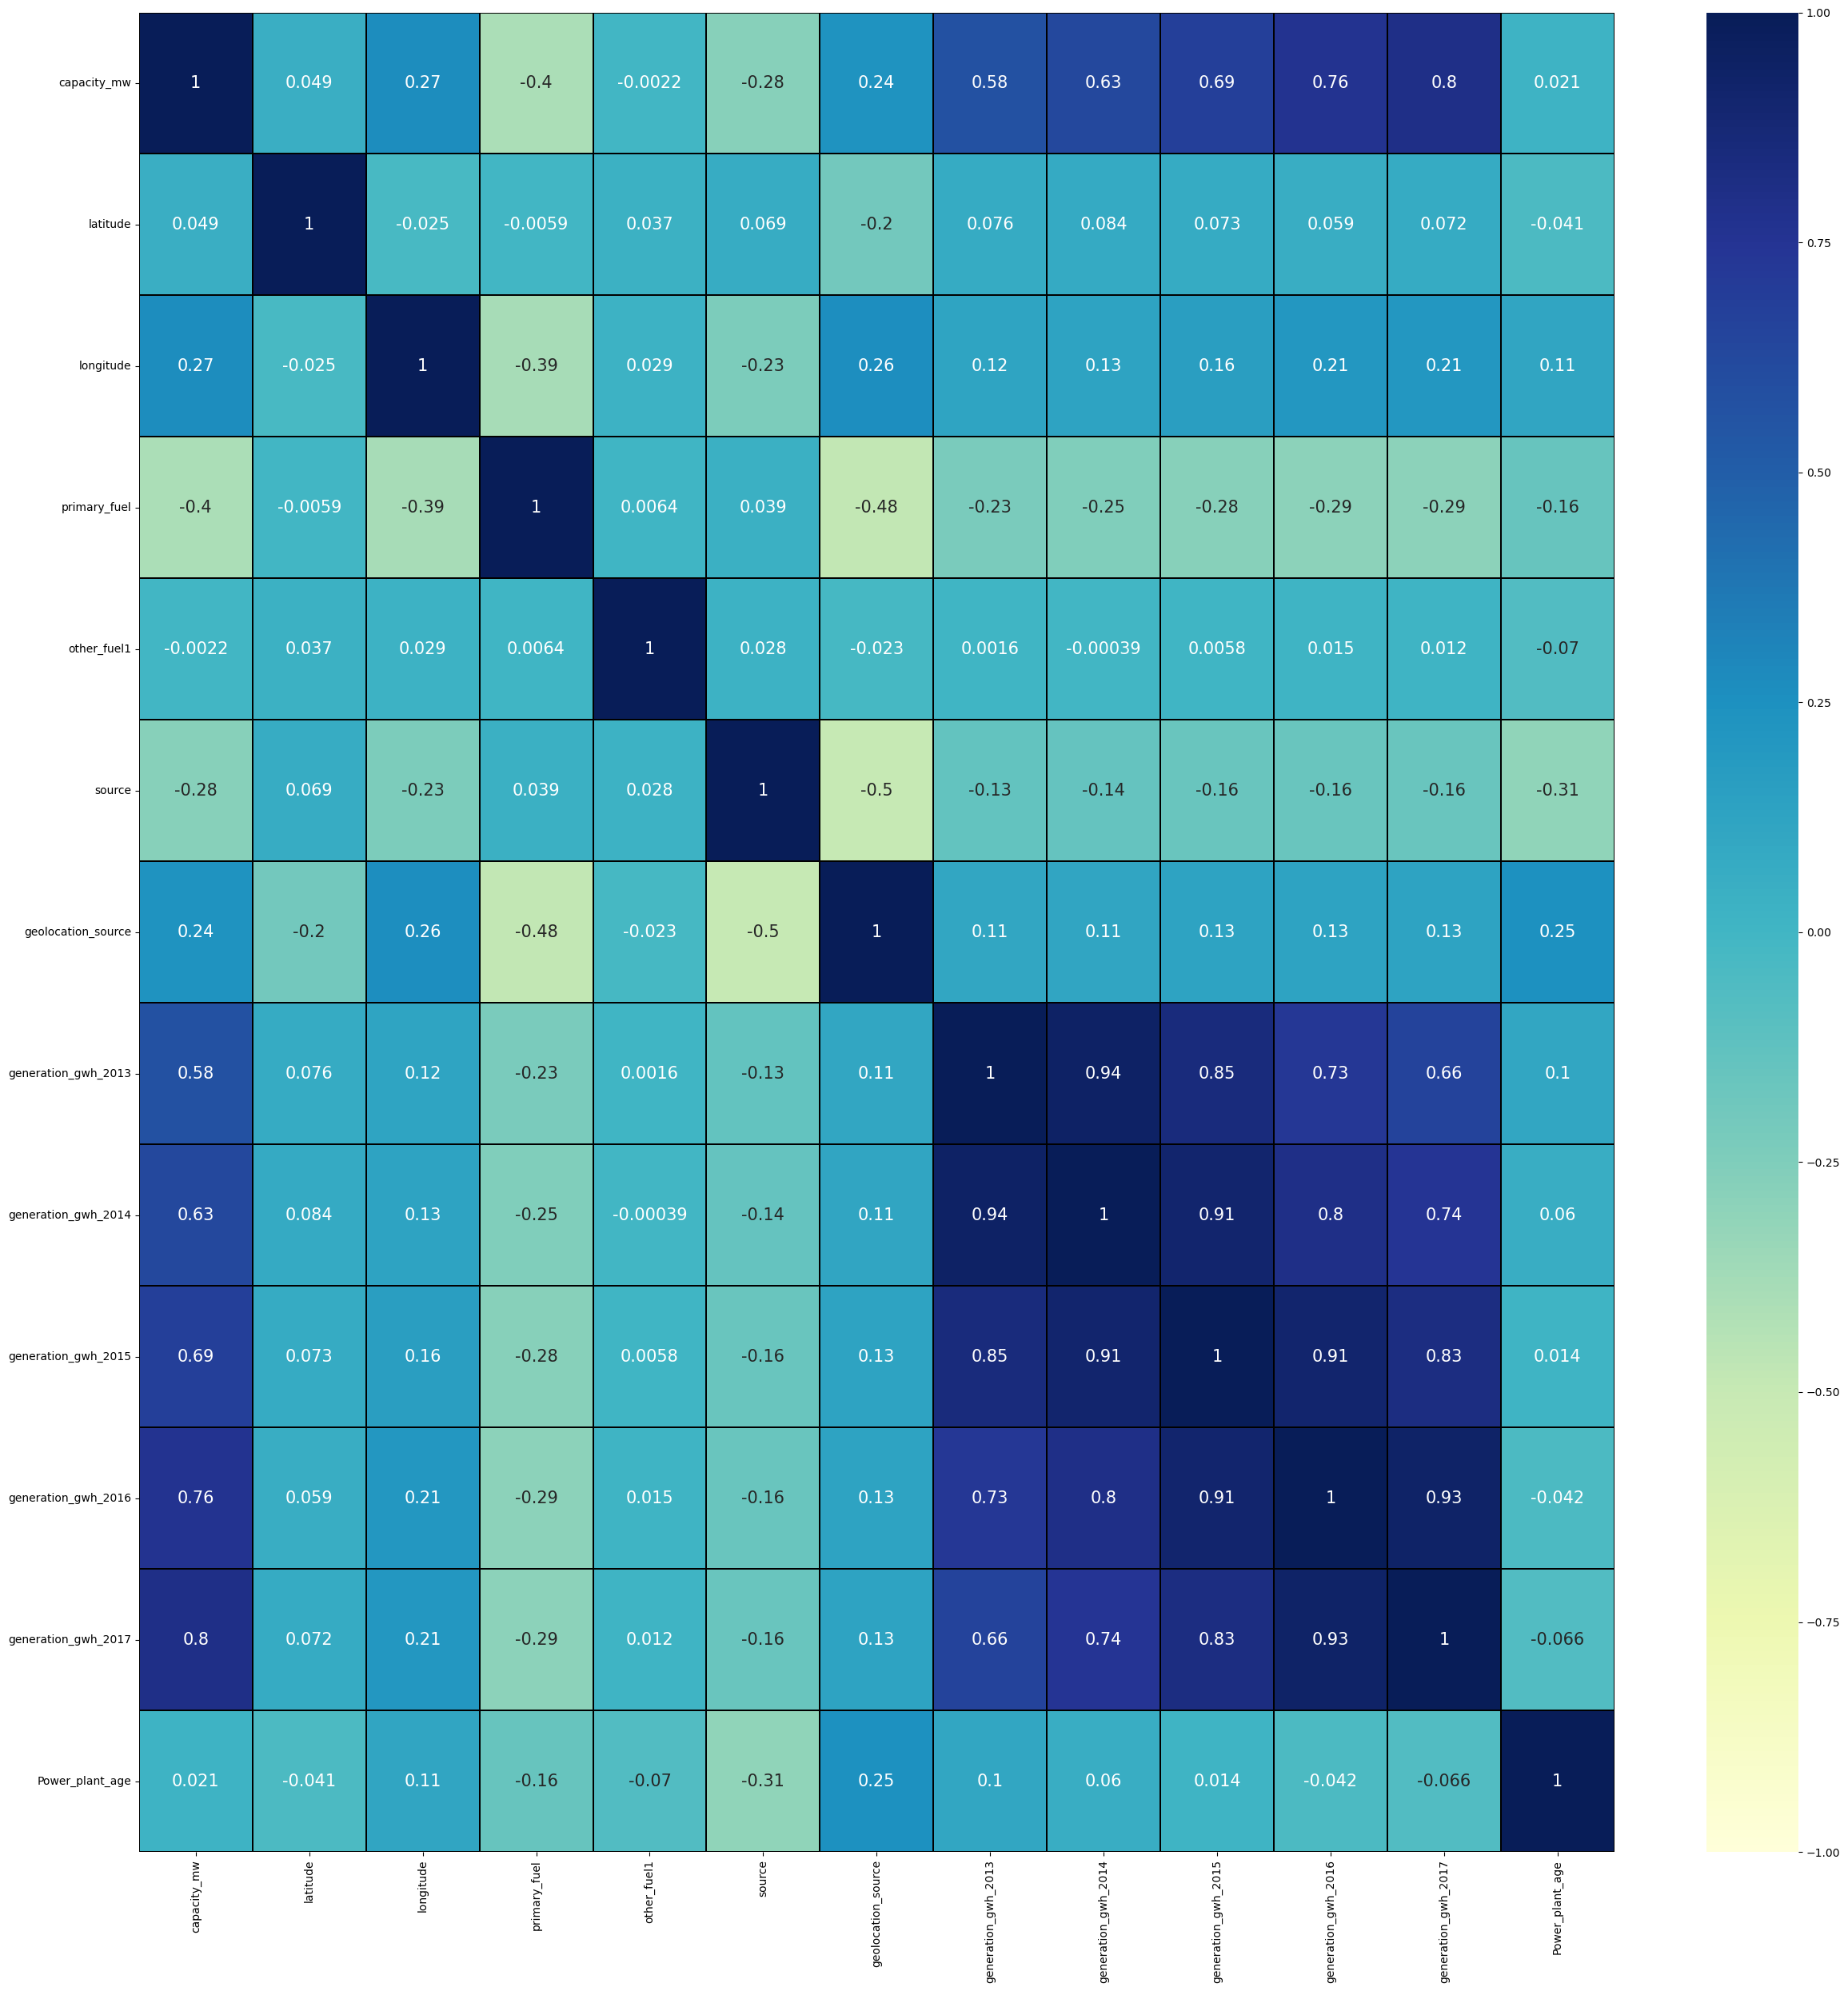

In [172]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,25))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap Shows the correlation matrix by visualizing the data .

We can observe the relation between feature to feature and feature to label.
This heat map contains both positive and negative correlation.
Correlation between capacity_mw and features

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014 , generation_gwh_2013.
& the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
The columns other_fuel1 and latitude have no relation with the label, so we can drop them.
Correlation between Fuel_Type and features

The label Fuel_Type is less correlate with Power_plant_age and source
The label is negatively correlated with geolocation_souce, longitude, capacity_mw and all generation_gwh years
From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearty problem. So will try to solve this problem by Checking VIF value befor building our models.
Also the features other_fuel1 and latitude have very less correlation with both the labels . Let's drop those columns

# Visualizing the correlation between label and features using bar plot

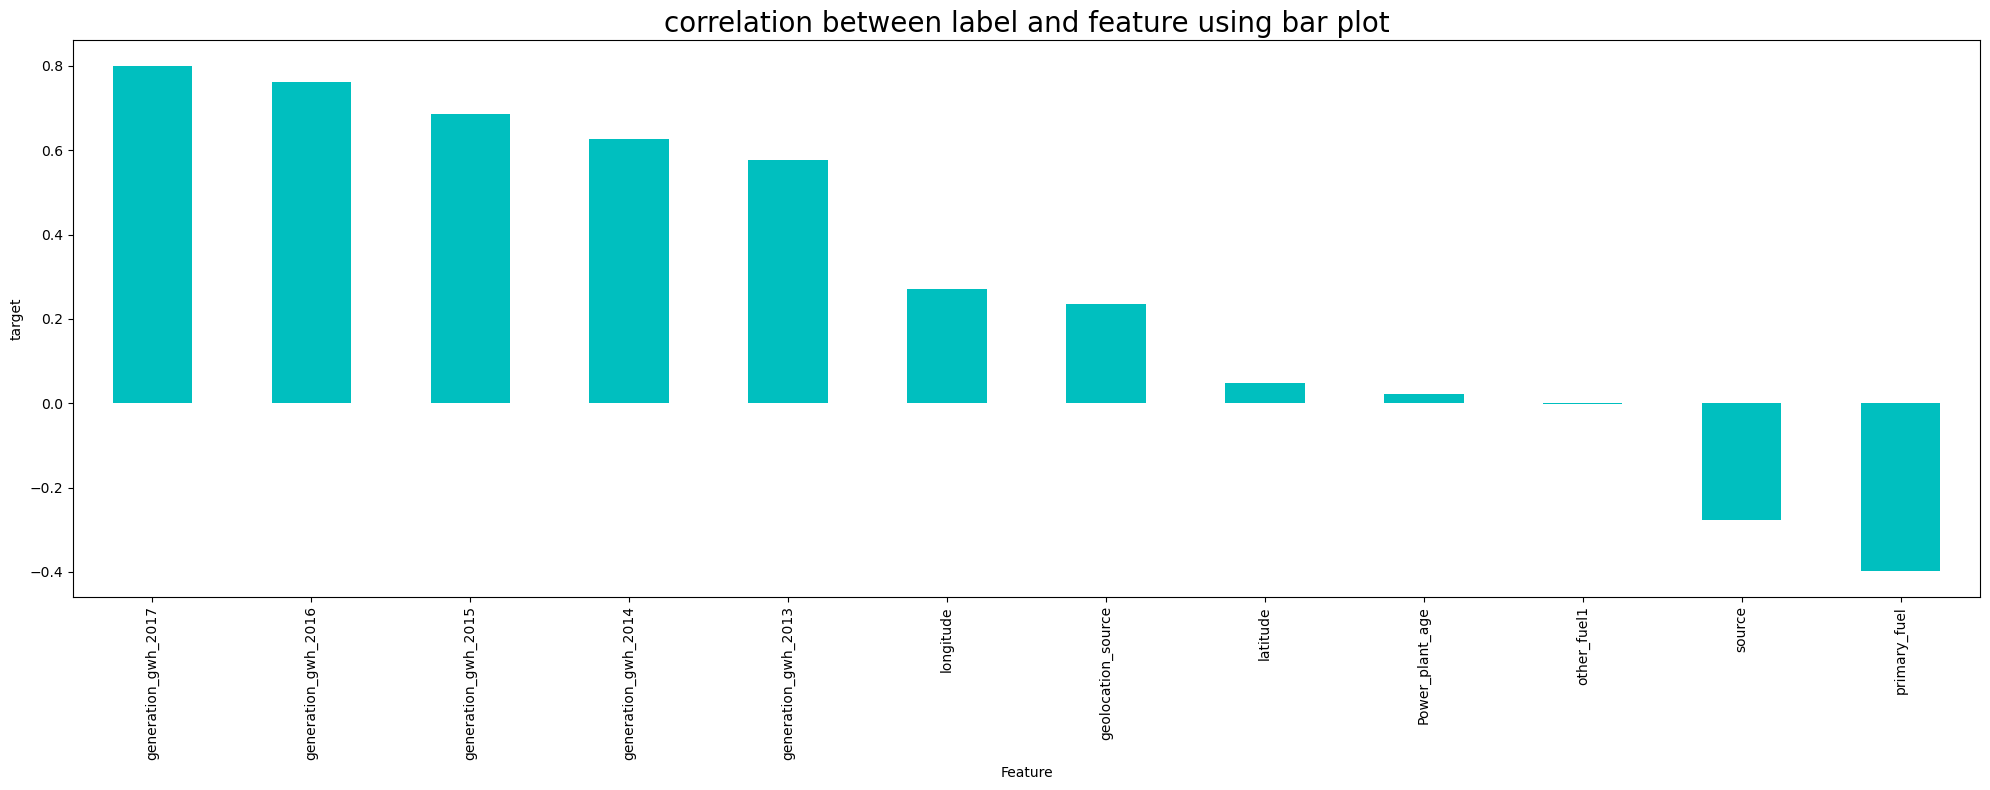

In [173]:
plt.figure(figsize=(20,8))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between capacity_mw and features . Here we can easily notice the positive and negative correlation between the features and the label.

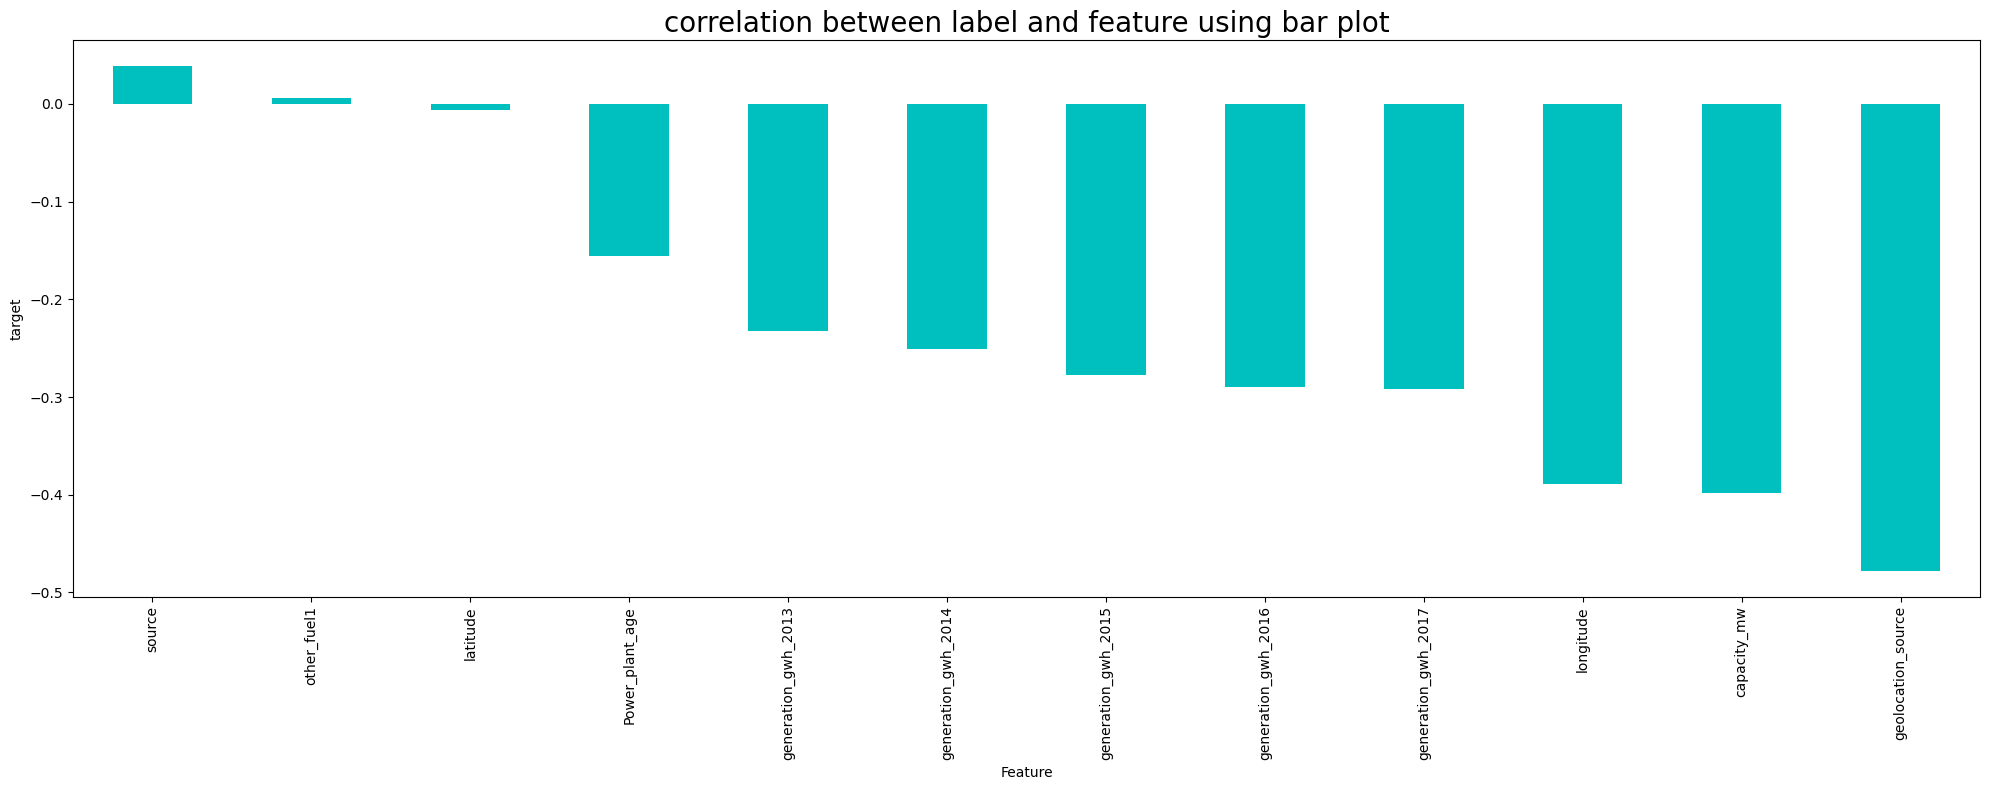

In [174]:
plt.figure(figsize=(20,8))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type.

Let's drop those columns.

In [175]:
# dropping irrelevant columns
new_df.drop('other_fuel1',axis=1,inplace=True)


In [176]:
new_df.skew()

capacity_mw            2.136025
latitude              -0.108598
longitude              0.889497
primary_fuel           0.414614
source                 1.737981
geolocation_source    -2.070461
generation_gwh_2013    3.097552
generation_gwh_2014    2.942112
generation_gwh_2015    2.716475
generation_gwh_2016    2.636972
generation_gwh_2017    2.533339
Power_plant_age        1.624589
dtype: float64

In [177]:
skew = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [178]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.146130
1,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
3,-0.257135,-0.274553,0.102661,0.120620,-0.190650,0.639034
4,0.745169,1.424517,2.285545,2.270675,1.972538,-1.216856


In [179]:
new_df.skew()

capacity_mw            2.136025
latitude              -0.108598
longitude              0.889497
primary_fuel           0.414614
source                 1.737981
geolocation_source    -2.070461
generation_gwh_2013    0.276562
generation_gwh_2014    0.232063
generation_gwh_2015    0.162147
generation_gwh_2016    0.145875
generation_gwh_2017    0.124929
Power_plant_age        0.019354
dtype: float64

SO here successfully removed the skewness from all the numerical columns using yeo-johnson method.

# 1. Prediction for capacity_mw

Separating the features and label variables into x and y

In [180]:
# Splitting data in target and dependent feature
X = new_df.drop(['capacity_mw'], axis =1)
Y = new_df['capacity_mw']

In [181]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (571, 11)
Training target vector size: (571,)
Test feature matrix size: (282, 11)
Test target vector size: (282,)


In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.6487521044164598 on Random_state 457


# Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=457, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 157.62626628  683.40570348  412.05069124  961.10997198  149.07369294
  144.49212951  731.94369682  447.06056187  342.29651609  918.35058169
   98.14892914  276.37754588  299.05411254  392.9956894   162.56803587
  226.94862347    8.22538055  -35.24739391  382.76530047  216.27689126
  743.56611102 -410.05549328  110.39419088  672.58109615  -58.3912537
  -93.44986281 -199.89643097   61.62168037  949.90965291  111.46732313
  243.15123807 -140.8499842   957.17115755  142.59503503  247.09629999
  -48.11199595  -28.19442887   60.31111872   78.08656798  895.1543
   73.48041417  320.1259347   492.28304059  303.16305197  186.22884181
 -377.76322583  309.04659147  -94.8920034    51.75273986  133.06231923
  886.69777508  261.94348103  110.39419088  -48.55181321  104.88320393
  953.66568419  137.20202081 -216.78334388  808.24060116  916.74290245
   96.55496904  201.86659937   73.82172876   72.31197158  327.42627608
  923.38823978  158.63652295  -88.63913067  345.63347177  834.990

The data is not normal but the skewness has been reduced in all the columns

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))


 Error :
Mean absolute error : 206.340238402377
Mean squared error : 83219.17943158268
Root Mean Squared Error: 288.47734647903064


 R2 Score :
0.6639518573440366


# Applying other ML Models

In [186]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('======================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 119.46978882405367
Mean squared error : 53290.51655301064
Root Mean Squared Error: 230.84738801426937


 R2 Score :
0.784807069342242


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 206.34037093809388
Mean squared error : 83219.45020861493
Root Mean Squared Error: 288.47781579978545


 R2 Score :
0.6639507639167836


 Error of  DecisionTreeRegressor() :
Mean absolute error : 158.46390364583334
Mean squared error : 102302.1838984161
Root Mean Squared Error: 319.8471258248479


 R2 Score :
0.5868925994761192


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 175.44432050922507
Mean squared error : 80665.06254508492
Root Mean Squared Error: 284.01595473685086


 R2 Score :
0.6742656605045141


 Error of  GradientBoostingRegressor() :
Mean absolute error : 136.115146396466
Mean squared error : 78936.54421998888
Root Mean Squared Error: 280.9564810072707


 R2 Score :
0.6812456064335998


 Error of  X

In [187]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('=============================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7677224772518745


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.5021089805739993


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5314112825947186


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.7030559291688225


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7453082747449743


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_de

Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor

# Hyper Parameter Tuning GridSearchCV

In [188]:
# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [189]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv = 5)

In [190]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [87]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

# Final Regression Model

In [191]:

Final_mod =  RandomForestRegressor(n_estimators=200 ,criterion = 'mse', max_depth= 6, max_features = 'log2',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 113.75788646280907
Mean squared error : 37914.103971739285
Root Mean Squared Error: 194.71544358817377


 R2 Score of Final Model :
0.8468987040344125




 Actual Values Vs Predicted Value plot :


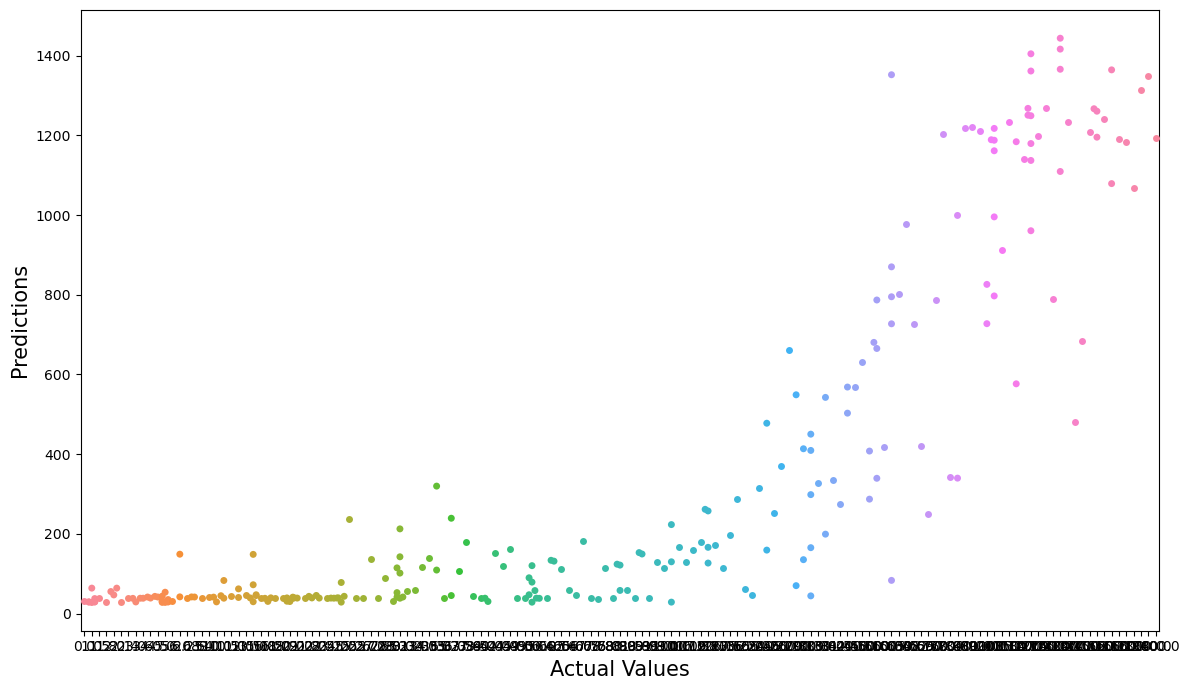

In [192]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Machine Learning Model Building Classification

In [193]:
# Splitting data in target and dependent feature
X = new_df.drop(['primary_fuel'], axis =1)
Y = new_df['primary_fuel']

In [206]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)
X

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,2.500000,28.183900,73.240700,109,1,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.146130
1,98.000000,24.766300,74.609000,174,2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
2,39.200000,21.903800,69.373200,21,2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
3,135.000000,23.871200,91.360200,22,2,-0.257135,-0.274553,0.102661,0.120620,-0.190650,0.639034
4,1800.000000,21.960300,82.409100,22,2,0.745169,1.424517,2.285545,2.270675,1.972538,-1.216856
...,...,...,...,...,...,...,...,...,...,...,...
1915,5.013881,21.215093,76.712060,21,2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
1916,89.267213,22.221538,70.274548,21,2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
1917,38.110511,23.291046,74.507408,21,2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819
1918,77.824784,19.046665,74.233559,21,2,-0.042493,-0.044277,-0.051439,-0.052798,-0.037515,-0.561819


In [195]:
X.skew()

capacity_mw            2.136025
latitude              -0.108598
longitude              0.889497
source                 1.737981
geolocation_source    -2.070461
generation_gwh_2013    0.276562
generation_gwh_2014    0.232063
generation_gwh_2015    0.162147
generation_gwh_2016    0.145875
generation_gwh_2017    0.124929
Power_plant_age        0.019354
dtype: float64

 We can observe the skewness in al the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these coluns

In [196]:
#Removing Skewness using yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

Now we have removed the skewness in all the numerical columns

In [197]:
Y.value_counts()

1    240
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

Here we can observe that the target variable Fuel_Type has multi classes means it is a multiclassification problem .
Also the data is not balanced so we will use oversampling method to balance the data.

In [198]:
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [199]:
Y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

# Modeling

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(X_train,Y_train)
    pred = DTC.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.90625  on Random_state  148


# Finding the best random state

In [208]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,test_size=.30,random_state=148)


In [209]:
from sklearn.metrics import classification_report, confusion_matrix
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# prediction
predDTC = DTC.predict(X_test)

print(accuracy_score(Y_test, predDTC))
print(confusion_matrix(Y_test, predDTC))
print(classification_report(Y_test, predDTC))

0.90625
[[67  0  0  0  0  0  0  0]
 [ 4 45  6  4  3  2  0  0]
 [ 0  3 62  2  1  0  0  0]
 [ 0  8  6 55  0  6  0  0]
 [ 0  2  0  1 75  0  0  0]
 [ 0  3  1  1  0 66  0  0]
 [ 0  1  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0 83]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       0.73      0.70      0.71        64
           2       0.83      0.91      0.87        68
           3       0.87      0.73      0.80        75
           4       0.95      0.96      0.96        78
           5       0.89      0.93      0.91        71
           6       1.00      0.99      0.99        70
           7       1.00      1.00      1.00        83

    accuracy                           0.91       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.91      0.91      0.90       576



In [211]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# prediction
predRFC = RFC.predict(X_test)

print(accuracy_score(Y_test, predRFC))
print(confusion_matrix(Y_test, predRFC))
print(classification_report(Y_test, predRFC))

0.9236111111111112
[[66  1  0  0  0  0  0  0]
 [ 4 43  8  5  3  1  0  0]
 [ 0  1 65  0  0  2  0  0]
 [ 0  7  3 58  2  5  0  0]
 [ 0  0  0  0 78  0  0  0]
 [ 0  2  0  0  0 69  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 83]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.80      0.67      0.73        64
           2       0.86      0.96      0.90        68
           3       0.92      0.77      0.84        75
           4       0.94      1.00      0.97        78
           5       0.90      0.97      0.93        71
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        83

    accuracy                           0.92       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.92      0.92       576



In [215]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# prediction
predsvc = svc.predict(X_test)

print(accuracy_score(Y_test, predsvc))
print(confusion_matrix(Y_test, predsvc))
print(classification_report(Y_test, predsvc))

0.8454861111111112
[[51  3  0  0  0  0  0 13]
 [ 8 38  9  3  5  0  0  1]
 [ 1  3 47  2  2 12  0  1]
 [ 0  8  3 58  1  5  0  0]
 [ 0  0  0  0 78  0  0  0]
 [ 2  2  0  1  0 65  0  1]
 [ 3  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 83]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        67
           1       0.70      0.59      0.64        64
           2       0.80      0.69      0.74        68
           3       0.91      0.77      0.83        75
           4       0.91      1.00      0.95        78
           5       0.79      0.92      0.85        71
           6       1.00      0.96      0.98        70
           7       0.84      1.00      0.91        83

    accuracy                           0.85       576
   macro avg       0.84      0.84      0.84       576
weighted avg       0.84      0.85      0.84       576



In [218]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)

# prediction
predGB = GB.predict(X_test)

print(accuracy_score(Y_test, predGB))
print(confusion_matrix(Y_test, predGB))
print(classification_report(Y_test, predGB))

0.9149305555555556
[[67  0  0  0  0  0  0  0]
 [ 3 44  6  6  4  1  0  0]
 [ 0  2 62  1  2  1  0  0]
 [ 0  5  6 59  1  4  0  0]
 [ 0  4  0  0 74  0  0  0]
 [ 0  2  0  0  0 69  0  0]
 [ 0  0  0  0  0  0 69  1]
 [ 0  0  0  0  0  0  0 83]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       0.77      0.69      0.73        64
           2       0.84      0.91      0.87        68
           3       0.89      0.79      0.84        75
           4       0.91      0.95      0.93        78
           5       0.92      0.97      0.95        71
           6       1.00      0.99      0.99        70
           7       0.99      1.00      0.99        83

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.91      0.91      0.91       576



In [221]:
from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier()
BC.fit(X_train,Y_train)

# prediction
predBC = BC.predict(X_test)

print(accuracy_score(Y_test, predBC))
print(confusion_matrix(Y_test, predBC))
print(classification_report(Y_test, predBC))

0.9131944444444444
[[66  1  0  0  0  0  0  0]
 [ 4 45 10  2  1  2  0  0]
 [ 1  3 62  1  0  1  0  0]
 [ 0  9  3 57  1  5  0  0]
 [ 0  3  0  0 75  0  0  0]
 [ 0  2  0  0  0 69  0  0]
 [ 0  1  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0 83]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.70      0.70      0.70        64
           2       0.83      0.91      0.87        68
           3       0.95      0.76      0.84        75
           4       0.97      0.96      0.97        78
           5       0.90      0.97      0.93        71
           6       1.00      0.99      0.99        70
           7       1.00      1.00      1.00        83

    accuracy                           0.91       576
   macro avg       0.91      0.91      0.91       576
weighted avg       0.92      0.91      0.91       576



In [222]:
# cv scor for Decision Tree Classifier
print(cross_val_score(DTC ,X,Y,cv=5).mean())

0.8911458333333332


In [223]:
# cv scor for Random Forest Classifier
print(cross_val_score(RFC ,X,Y,cv=5).mean())

0.9114583333333333


In [227]:
# cv scor for Support Vector Classifier
print(cross_val_score(svc,X,Y,cv=5).mean())

0.396875


In [225]:
# cv scor for Gradient Boosting Classifier
print(cross_val_score(GB ,X,Y,cv=5).mean())

0.9026041666666667


In [226]:
# cv scor for Bagging Classifier
print(cross_val_score(BC ,X,Y,cv=5).mean())

0.9010416666666667


Above are the cross validation score for all the models used.
The difference between accuracy score and cross validation score of RandomForestClassifier is very less compared to other models .

So we can conclude that RandomForestClassifier as our best fitting model.

# Hyper Parameter Tuning GridSearchCV

In [238]:
# RandomForestClassifier
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5, 6, 8]
}

In [239]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [240]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [245]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

# Final Classification Model

In [248]:
fuel_type =RandomForestClassifier (criterion='entropy', max_depth=8, max_features='sqrt', n_estimators=100)
fuel_type.fit(X_train,Y_train)
pred = fuel_type.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)


90.27777777777779


In [249]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']